In [156]:
import pandas as pd

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data=pd.read_csv("titanic.csv")

In [159]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [160]:
data.nunique()# checking how many categories in each column for categorical and non categorical

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [161]:
data.isnull().sum()# checking if there is any null value in the data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [162]:
data["Age"].fillna(data["Age"].median(),inplace=True)# filling null values with median 

In [163]:
data["Fare"].fillna(data["Fare"].median(),inplace=True)# filling null values with median 

In [164]:
data["Cabin"].fillna("NA",inplace=True)# removing null data with "NA"

In [165]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [166]:
data.describe()#detailed analysis of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# calculating the IQR and checking the indices of outliers

In [167]:
def IQR_cal(data):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    IQR=Q3-Q1
    iqrm=1.5*IQR
    upper_lim=Q3+iqrm
    lower_lim=Q1-iqrm
    outlier_list_col = data[(data < Q1 - iqrm) | (data > Q3 + iqrm )].index
    return(outlier_list_col)
    
result=IQR_cal(data["Age"])# finding out the indices of outliers
print(result)

Int64Index([  2,  13,  20,  48,  69,  77,  81,  89,  96, 114, 117, 142, 152,
            179, 193, 201, 213, 217, 236, 240, 250, 263, 281, 284, 296, 305,
            307, 308, 314, 316, 343, 354, 356, 378, 387, 409],
           dtype='int64')


In [168]:
result=IQR_cal(data["Parch"])# finding out the indices of outliers
print(result)

Int64Index([  4,   7,  21,  23,  24,  26,  32,  33,  40,  49,  52,  53,  55,
             64,  69,  80,  89,  92, 104, 117, 125, 132, 139, 140, 142, 149,
            150, 153, 154, 159, 161, 165, 167, 174, 175, 178, 179, 181, 184,
            186, 188, 192, 194, 196, 201, 203, 214, 217, 218, 225, 238, 241,
            242, 244, 247, 250, 262, 263, 281, 283, 284, 293, 296, 302, 305,
            306, 307, 308, 326, 330, 333, 337, 342, 343, 344, 350, 353, 354,
            360, 361, 365, 368, 374, 379, 385, 389, 391, 392, 394, 397, 402,
            407, 409, 417],
           dtype='int64')


In [169]:
result=IQR_cal(data["SibSp"])# finding out the indices of outliers
print(result)

Int64Index([53, 55, 140, 145, 154, 188, 214, 360, 379, 389, 394], dtype='int64')


In [170]:
data.drop(columns=["Name"],inplace=True)# dropping the column who is not important

In [171]:
data=data.drop(columns=["Ticket","Cabin","PassengerId"],axis=1)

In [172]:
x=data.drop(columns="Survived",axis=1)

In [173]:
print(x)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male  27.0      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male  27.0      0      0    8.0500        S
417       3    male  27.0      1      1   22.3583        C

[418 rows x 7 columns]


In [174]:
x=x.replace({"Sex":{"male":0,"female":1}})
print(x)

     Pclass  Sex   Age  SibSp  Parch      Fare Embarked
0         3    0  34.5      0      0    7.8292        Q
1         3    1  47.0      1      0    7.0000        S
2         2    0  62.0      0      0    9.6875        Q
3         3    0  27.0      0      0    8.6625        S
4         3    1  22.0      1      1   12.2875        S
..      ...  ...   ...    ...    ...       ...      ...
413       3    0  27.0      0      0    8.0500        S
414       1    1  39.0      0      0  108.9000        C
415       3    0  38.5      0      0    7.2500        S
416       3    0  27.0      0      0    8.0500        S
417       3    0  27.0      1      1   22.3583        C

[418 rows x 7 columns]


In [175]:
y=data["Survived"]
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [176]:
x=pd.get_dummies(x)

In [177]:
print(x)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
0         3    0  34.5      0      0    7.8292           0           1   
1         3    1  47.0      1      0    7.0000           0           0   
2         2    0  62.0      0      0    9.6875           0           1   
3         3    0  27.0      0      0    8.6625           0           0   
4         3    1  22.0      1      1   12.2875           0           0   
..      ...  ...   ...    ...    ...       ...         ...         ...   
413       3    0  27.0      0      0    8.0500           0           0   
414       1    1  39.0      0      0  108.9000           1           0   
415       3    0  38.5      0      0    7.2500           0           0   
416       3    0  27.0      0      0    8.0500           0           0   
417       3    0  27.0      1      1   22.3583           1           0   

     Embarked_S  
0             0  
1             1  
2             0  
3             1  
4             1  
.. 

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr=LogisticRegression(random_state=42)

In [182]:
lr.fit(xtrain,ytrain)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [183]:
ypred=lr.predict(xtest)

In [184]:
ypred.shape

(84,)

In [188]:
ytest=np.array(ytest)
ytest=ytest.reshape(-1,1)
type(ytest)
ytest.ndim


2

In [198]:
lr.score(xtest,ytest)

1.0

In [234]:
from sklearn.svm import SVC

In [200]:
clf=SVC(random_state=42)
clf.fit(xtrain,ytrain)

SVC(random_state=42)

In [201]:
ysvm_pred=clf.predict(xtest)

In [202]:
type(ysvm_pred)

numpy.ndarray

In [194]:
ytest=np.array(ytest)

In [195]:
ytest.ndim

2

In [203]:
clf.score(xtest,ytest)

0.6071428571428571

In [204]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(ysvm_pred)):
    if ysvm_pred[i] == ytest[i] == 1:
        TP+=1
    elif ysvm_pred[i] == ytest[i] == 0:
        TN+=1
    elif ysvm_pred[i] == 1 and ytest[i] == 0:
        FP+=1
    elif ysvm_pred[i] == 0 and ytest[i] == 1:
        FN+=1


In [205]:
print(f"True positive is equals to :{TP}")
print(f"True negative is equals to :{TN}")
print(f"false positive is equals to :{FP}")
print(f"false negative is equals to :{FN}")

True positive is equals to :2
True negative is equals to :49
false positive is equals to :1
false negative is equals to :32


In [208]:
#calculating the accuracy
from sklearn import metrics


In [215]:
accuracy=metrics.accuracy_score(ytest,ysvm_pred)

In [216]:
accuracy

0.6071428571428571

In [214]:
precision=metrics.precision_score(ysvm_pred,ytest)
precision

0.058823529411764705

In [217]:
recall_sensitivity=metrics.recall_score(ysvm_pred,ytest)
print(recall_sensitivity)
recall_specificity=metrics.recall_score(ysvm_pred,ytest,pos_label=0)
print(recall_specificity)

0.6666666666666666
0.6049382716049383


In [218]:
# f1_score=2*((precision*recall_sensitivity)/(precision+recall_sensitivity))
f1_score=metrics.f1_score(ytest,ysvm_pred)
print(f1_score)

0.10810810810810811


In [219]:
cm=metrics.confusion_matrix(ytest,ysvm_pred)


In [220]:
print(cm)

[[49  1]
 [32  2]]


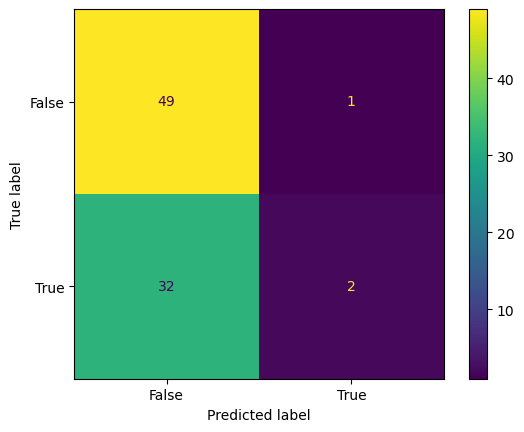

In [222]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

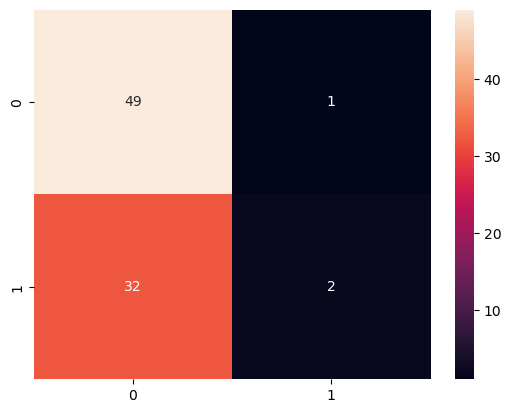

In [226]:
sns.heatmap(cm,annot=True)
plt.show()

In [227]:
from sklearn.metrics import classification_report

In [229]:
matrix=classification_report(ytest,ysvm_pred,labels=[1,0])
print(matrix)

              precision    recall  f1-score   support

           1       0.67      0.06      0.11        34
           0       0.60      0.98      0.75        50

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84



### using kfold cross validation

In [239]:
from sklearn.model_selection import KFold#importing kfold

In [244]:
KF=KFold(n_splits=5)#creating an instance of KFold class
print(KF)

KFold(n_splits=5, random_state=None, shuffle=False)


In [248]:
from sklearn.model_selection import cross_val_score# importing cross_val_score from sklearn

In [246]:
svm_cross_val=cross_val_score(SVC(),x,y,cv=5)

In [247]:
print(svm_cross_val)

[0.66666667 0.63095238 0.5952381  0.60240964 0.63855422]
